In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes

# Tải dữ liệu
data = load_diabetes(as_frame=True)
df = data.frame

# Chuyển đổi target thành nhị phân (nếu target > 140, coi là "có nguy cơ tiểu đường")
df['target'] = (df['target'] > 140).astype(int)

# Tách đặc trưng (X) và nhãn (y)
X = df.drop(columns=['target'])
y = df['target']

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu (MinMaxScaler để giữ thông tin)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_knn.fit(X_train, y_train)

best_knn = grid_knn.best_estimator_
acc_knn = best_knn.score(X_test, y_test)
print(f'Best kNN Accuracy: {acc_knn:.4f}')


Best kNN Accuracy: 0.6854


In [3]:
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
acc_svm_linear = svm_linear.score(X_test, y_test)
print(f'SVM Linear Accuracy: {acc_svm_linear:.4f}')


SVM Linear Accuracy: 0.7079


In [4]:
svm_rbf = SVC(kernel='rbf', C=1, gamma=0.1)
svm_rbf.fit(X_train, y_train)
acc_svm_rbf = svm_rbf.score(X_test, y_test)
print(f'SVM RBF Accuracy: {acc_svm_rbf:.4f}')


SVM RBF Accuracy: 0.7753


In [5]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C=1, solver='liblinear')
log_reg.fit(X_train, y_train)
acc_log_reg = log_reg.score(X_test, y_test)
print(f'Logistic Regression Accuracy: {acc_log_reg:.4f}')


Logistic Regression Accuracy: 0.7303


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Xây dựng mô hình MLP cải tiến
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu'),
    Dropout(0.2),

    Dense(32, activation='relu'),
    
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Đánh giá mô hình
loss, acc_dl = model.evaluate(X_test, y_test)
print(f'Deep Learning Accuracy: {acc_dl:.4f}')


Epoch 1/50
23/23 [==============================] - 1s 10ms/step - loss: 0.6605 - accuracy: 0.6119 - val_loss: 0.6851 - val_accuracy: 0.4607
Epoch 2/50
23/23 [==============================] - 0s 2ms/step - loss: 0.5504 - accuracy: 0.7110 - val_loss: 0.6741 - val_accuracy: 0.4494
Epoch 3/50
23/23 [==============================] - 0s 2ms/step - loss: 0.5084 - accuracy: 0.7564 - val_loss: 0.6643 - val_accuracy: 0.5506
Epoch 4/50
23/23 [==============================] - 0s 2ms/step - loss: 0.4989 - accuracy: 0.7535 - val_loss: 0.6549 - val_accuracy: 0.5730
Epoch 5/50
23/23 [==============================] - 0s 3ms/step - loss: 0.5053 - accuracy: 0.7620 - val_loss: 0.6515 - val_accuracy: 0.5730
Epoch 6/50
23/23 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.7649 - val_loss: 0.6338 - val_accuracy: 0.6854
Epoch 7/50
23/23 [==============================] - 0s 2ms/step - loss: 0.4821 - accuracy: 0.7479 - val_loss: 0.6280 - val_accuracy: 0.6854
Epoch 8/50
23/23 [=

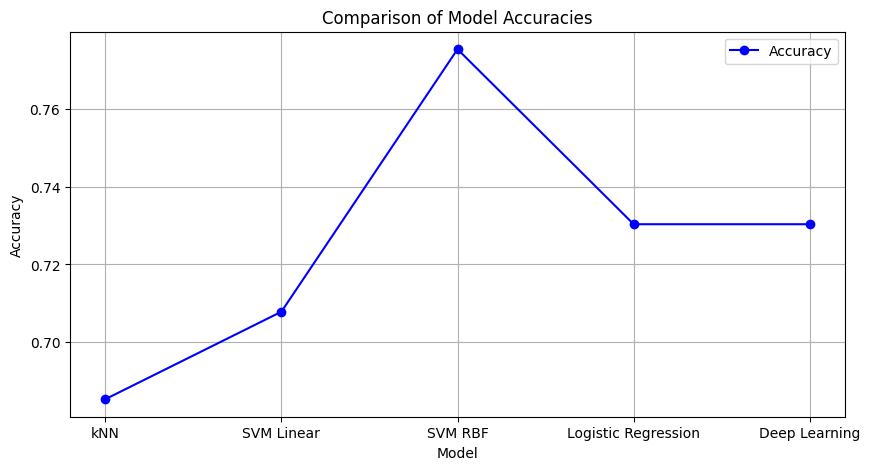

In [7]:
import matplotlib.pyplot as plt

accuracy_scores = [acc_knn, acc_svm_linear, acc_svm_rbf, acc_log_reg, acc_dl]
model_names = ['kNN', 'SVM Linear', 'SVM RBF', 'Logistic Regression', 'Deep Learning']

plt.figure(figsize=(10, 5))
plt.plot(model_names, accuracy_scores, marker='o', linestyle='-', color='b', label="Accuracy")
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.legend()
plt.grid()
plt.show()
